# Simulação do modelo compartimental SEIRD usando Python e Jupyter

Doenças infecciosas podem ser classificadas em duas categorias, as causadas por microparasitas (vírus e bactérias) e por macroparasitas (vermes).  A COVID-19 ́e causada por um microparasita, o coronavírus.  Doenças causadas por esse tipo de agente são transmitidas quando há contato entre um hospedeiro carregando o agente e um indivíduo suscetível.

O modelo SIR (suscetível – infectado – recuperado) é um modelo matematicamente simples que representa bem as doenças de transmissãodireta.

A maioria das doenças infecciosas não afetam imediatamente o indivíduo exposto a elas, ́e necessário um tempo de ativação até que o infectado comece a ter sintomas ou a propagar a doença. 

Fazendo uma extensão natural do modelo SIR, o SEIR adiciona uma compartimento referido como Expostos(E). Esse compartimento contém os indivíduos que foram infectados mas não apresentam sintomas ou não infectam outros indivíduos pois o vírus ainda esta em seu período de incubação.

Quando uma doença provoca uma quantidade significativa de ́obitos, ́e importante que estes também sejam avaliados e incorporados ao modelo. Fizemos então uma extensão do SEIR, com algumas mudanças. Adicionamos a variável D, que indica o número de mortos.

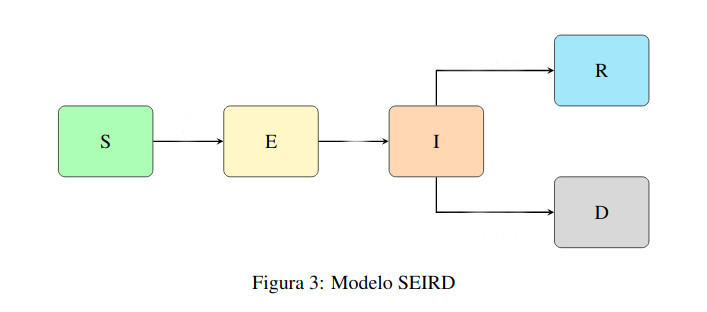

## Modelo SEIRD


Precisamos desenvolver algumas equações que regem o modelo SEIRD:

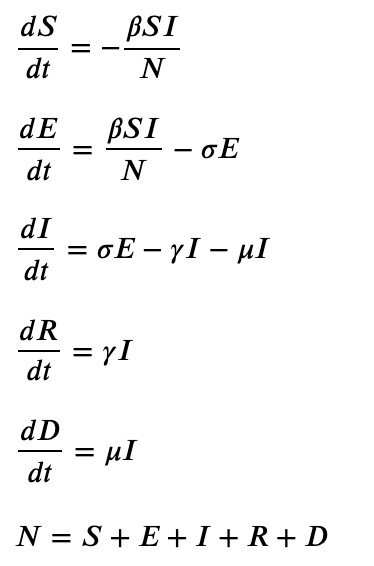

dS/dt -> é a taxa de população suscetível

dE/dt -> é a taxa de população Exposto

dI/dt -> é a taxa de população Infectado

dR/dt -> é a taxa de população Recuperada

dD/dt -> é a taxa de população Morta

    β-> taxa de Infectado
    
    σ-> taxa de Incubação
    
    γ-> taxa de Recuperado
    
    μ-> taxa de Morte
    
    N-> total de População


## Iniciaremos uma série de exemplos nos quais buscamos simular o contexto vivido.

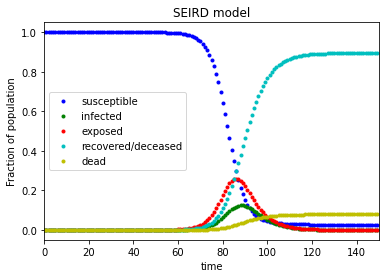

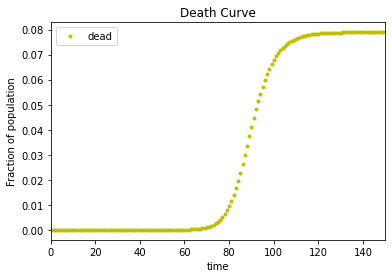

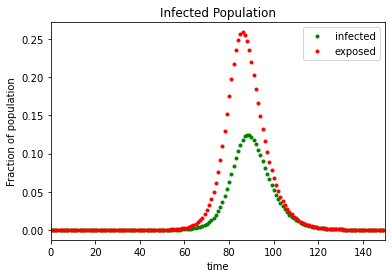

In [5]:
#Declaração das bibliotecas necessarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcao utilizada pelo metodo Runge-Kutta onde calculamos as equacoes do modelo SEIRD
def funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs):
    fs = (-beta*a*b) * hs
    fe = (beta*a*b - sigma*e) * hs
    fi = (sigma * e - gamma * b - mi * b) * hs
    fr = (gamma*b) * hs
    fd = (mi * b) * hs
    return [fs, fe, fi, fr, fd]


# Metodo Runge-Kutta de quarta ordem 
def runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e):

    [a1, e1, b1, c1, d1] = funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor * 0.5 for indice, valor in enumerate([a1, b1, c1, d1, e1])]

    [a2, e2, b2, c2, d2] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor * 0.5 for indice, valor in enumerate([a2, b2, c2, d2, e2])]

    [a3, e3, b3, c3, d3] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor for indice, valor in enumerate([a3, b3, c3, d3, e3])]

    [a4, e4, b4, c4, d4] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs)

    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    d = d + (d1 + 2*(d2 + d3) + d4)/6
    e = e + (e1 + 2*(e2 + e3) + e4)/6
    return a, b, c, d, e

# Representa o modelo SEIRD
def SEIRD(N, b0, beta, gamma, hs, mi, sigma):

    # condicao de inicializacao
    a = float(N - 2) / N - b0
    b = float(1) / N + b0
    e = float(1) / N + b0
    c = 0.
    d = 0.

    sus, inf, rec, mort, exp = [], [], [], [], []
    for i in range(150):  # roda o numero de passos
        sus.append(a)
        inf.append(b)
        rec.append(c)
        mort.append(d)
        exp.append(e)
        a, b, c, d, e = runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e)

    return sus, inf, rec, mort, exp

#Parametros para os exemplos
N = 1380*(10**6)   
b0 = 0
beta = 1.38
gamma = 0.34
sigma = 0.19
mi = 0.03
hs = 1

sus, inf, rec, mort, exp = SEIRD(N, b0, beta, gamma, hs, mi, sigma)

#Plotagem dos graficos

f = plt.figure(figsize=(6,4))
plt.plot(sus, 'b.', label='susceptible')
plt.plot(inf, 'g.', label='infected')
plt.plot(exp, 'r.', label='exposed')
plt.plot(rec, 'c.', label='recovered/deceased')
plt.plot(mort, 'y.', label='dead')
plt.title("SEIRD model")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,150)
plt.savefig('SEIRD1_example.png')

f1 = plt.figure(figsize=(6,4))
plt.plot(mort, 'y.', label='dead')
plt.title("Death Curve")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,150)
plt.savefig('SEIRD2_example.png')

f2 = plt.figure(figsize=(6,4))
plt.plot(inf, 'g.', label='infected')
plt.plot(exp, 'r.', label='exposed')
plt.title("Infected Population")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,150)
plt.savefig('SEIRD3_example.png')


plt.show()


A figura 1 nos mostra um copilado das equações do modelo SEIRD, já nas figuras 2 e 3 podemos verificar com maior precisão o comportamento do numero de exposto, infectado e mortos. Podemos constatar que apartir de uma prazo de 70 dias o numero de casos começa a subir de forma explosiva. 

## Utilizando fator de distanciamento social no modelo SEIRD

A prática busca restringir o contato entre as pessoas por meio de várias medidas. A primeira delas é pedir que as pessoas fiquem em casa, o que já tem sido feito. Em seguida, ocorre o fechamento de escolas, universidades, escritórios e outros estabelecimentos considerados não prioritários, como cinemas, shoppings e academias.

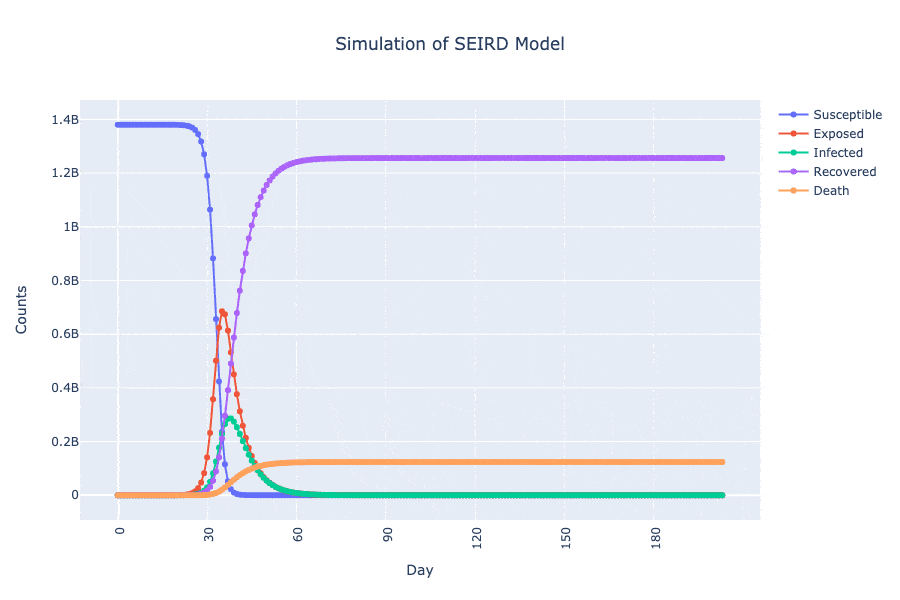

A idéia é por meio do distanciamento social, mover e achatar o pico de exposto e infectado como demostra a animação acima. Precisamos criar um controle no numero de Sucetíveis onde podemos variar o grau de distanciamento social, de 0(sem controle social) a 1(totalmente isolado).

Um exemplo de alteração no código será nas equações: 
    
    fs = (1-t)*(-beta*a*b) * hs
    fe = ((1-t)*beta*a*b - sigma*e) * hs

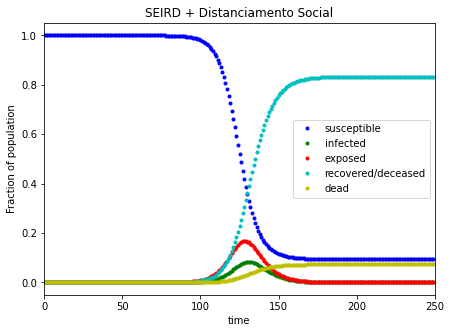

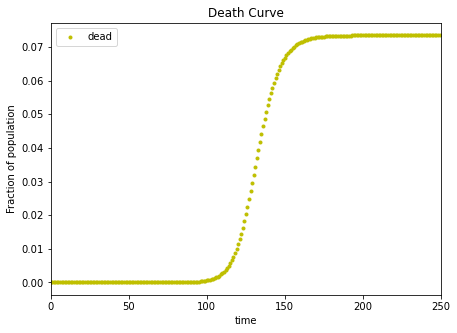

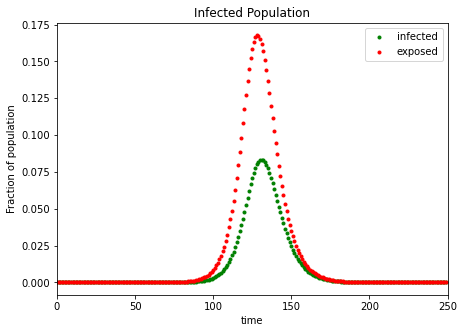

In [6]:
#Declaração das bibliotecas necessarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcao utilizada pelo metodo Runge-Kutta onde calculamos as equacoes do modelo SEIRD
def funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs, t):
    fs = (1-t)*(-beta*a*b) * hs
    fe = ((1-t)*beta*a*b - sigma*e) * hs
    fi = (sigma * e - gamma * b - mi * b) * hs
    fr = (gamma*b) * hs
    fd = (mi * b) * hs
    return [fs, fe, fi, fr, fd]


# Metodo Runge-Kutta de quarta ordem 
def runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e, tau):

    [a1, e1, b1, c1, d1] = funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs, tau)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor * 0.5 for indice, valor in enumerate([a1, b1, c1, d1, e1])]

    [a2, e2, b2, c2, d2] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, tau)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor * 0.5 for indice, valor in enumerate([a2, b2, c2, d2, e2])]

    [a3, e3, b3, c3, d3] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, tau)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor for indice, valor in enumerate([a3, b3, c3, d3, e3])]

    [a4, e4, b4, c4, d4] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, tau)

    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    d = d + (d1 + 2*(d2 + d3) + d4)/6
    e = e + (e1 + 2*(e2 + e3) + e4)/6
    return a, b, c, d, e

# Representa o modelo SEIRD
def SEIRD(N, b0, beta, gamma, hs, mi, sigma, tau):

    # Initial condition
    a = float(N - 2) / N - b0
    b = float(1) / N + b0
    e = float(1) / N + b0
    c = 0.
    d = 0.

    sus, inf, rec, mort, exp = [], [], [], [], []
    for i in range(250):  # roda o numero de passos
        sus.append(a)
        inf.append(b)
        rec.append(c)
        mort.append(d)
        exp.append(e)
        a, b, c, d, e = runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e, tau)

    return sus, inf, rec, mort, exp

#Parametros para os exemplos
N = 1380*(10**6)
b0 = 0
beta = 1.38
gamma = 0.34
sigma = 0.19
mi = 0.03
hs = 1
tau = 0.3        #### Representa o distanciamento social

sus, inf, rec, mort, exp = SEIRD(N, b0, beta, gamma, hs, mi, sigma, tau)


#Plotagem dos graficos

f = plt.figure(figsize=(7,5))
plt.plot(sus, 'b.', label='susceptible')
plt.plot(inf, 'g.', label='infected')
plt.plot(exp, 'r.', label='exposed')
plt.plot(rec, 'c.', label='recovered/deceased')
plt.plot(mort, 'y.', label='dead')
plt.title("SEIRD + Distanciamento Social")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,250)
plt.savefig('SEIRD1_example.png')

f1 = plt.figure(figsize=(7,5))
plt.plot(mort, 'y.', label='dead')
plt.title("Death Curve")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,250)
plt.savefig('SEIRD2_example.png')

f2 = plt.figure(figsize=(7,5))
plt.plot(inf, 'g.', label='infected')
plt.plot(exp, 'r.', label='exposed')
plt.title("Infected Population")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,250)
plt.savefig('SEIRD3_example.png')


plt.show()


Podemos constatar uma diminuição no pico de infecção do grafico acima em comparação com o exemplo anterior.
Essa diminuição foi causada por uma ação de isolamento social em torno de 40%. A curva de Morte também sofreu uma pequena inclinação.

## Disponibilidade de leitos das UTIs

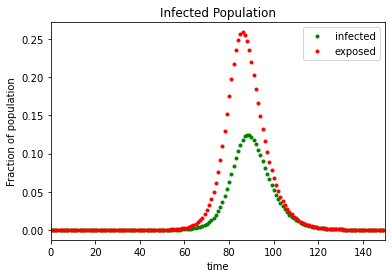

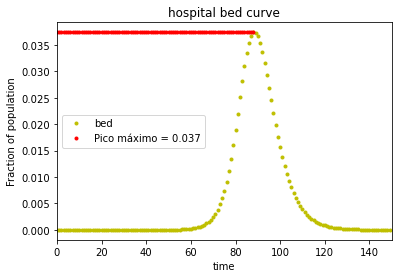

In [7]:
#Declaração das bibliotecas necessarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcao utilizada pelo metodo Runge-Kutta onde calculamos as equacoes do modelo SEIRD
def funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs, f, l):
    fs = (-beta*a*b) * hs
    fe = (beta*a*b - sigma*e) * hs
    fi = (sigma * e - gamma * b - mi * b) * hs
    fr = (gamma*b) * hs
    fd = (mi * b) * hs
    fl = l * fi
    return [fs, fe, fi, fr, fd, fl]


# Metodo Runge-Kutta de quarta ordem
def runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e, f, l):

    [a1, e1, b1, c1, d1, f1] = funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs, f, l)

    [ak, bk, ck, dk, ek, fk] = [[a, b, c, d, e, f][indice] + valor * 0.5 for indice, valor in enumerate([a1, b1, c1, d1, e1, f1])]

    [a2, e2, b2, c2, d2, f2] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, fk, l)

    [ak, bk, ck, dk, ek, fk] = [[a, b, c, d, e, f][indice] + valor * 0.5 for indice, valor in enumerate([a2, b2, c2, d2, e2, f2])]

    [a3, e3, b3, c3, d3, f3] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, fk, l)

    [ak, bk, ck, dk, ek, fk] = [[a, b, c, d, e, f][indice] + valor for indice, valor in enumerate([a3, b3, c3, d3, e3, f3])]

    [a4, e4, b4, c4, d4, f4] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, fk, l)

    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    d = d + (d1 + 2*(d2 + d3) + d4)/6
    e = e + (e1 + 2*(e2 + e3) + e4)/6
    f = f + (f1 + 2*(f2 + f3) + f4)/6
    return a, b, c, d, e, f

# Representa o modelo SEIRD
def SEIRD(N, b0, beta, gamma, hs, mi, sigma, l):

    # condicao de inicializacao
    a = float(N - 2) / N - b0
    b = float(1) / N + b0
    e = float(1) / N + b0
    c = 0.
    d = 0.
    f = 0.

    sus, inf, rec, mort, exp, leit = [], [], [], [], [], []
    for i in range(150):  # roda o numero de passos
        sus.append(a)
        inf.append(b)
        rec.append(c)
        mort.append(d)
        exp.append(e)
        leit.append(f)
        a, b, c, d, e, f = runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e, f, l)

    return sus, inf, rec, mort, exp, leit

#Parametros para os exemplos
N = 1380*(10**6)
b0 = 0
beta = 1.38
gamma = 0.34
sigma = 0.19
mi = 0.03
hs = 1
l = 0.3

sus, inf, rec, mort, exp, leit = SEIRD(N, b0, beta, gamma, hs, mi, sigma, l)

#Plotagem dos graficos

f2 = plt.figure(figsize=(6,4))
plt.plot(inf, 'g.', label='infected')
plt.plot(exp, 'r.', label='exposed')
plt.title("Infected Population")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,150)
plt.savefig('SEIRD3_example.png')


f3 = plt.figure(figsize=(6,4))
plt.plot(leit, 'y.', label='bed')
plt.plot([max(leit) for i, v in enumerate(leit) if i <= leit.index(max(leit))], 'r.', label=f'Pico máximo = {round(max(leit), 3)}')
plt.title("hospital bed curve")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,150)
plt.savefig('SEIRD4_example.png')


plt.show()


Essa simulação nos mostra o ponto extremo de internações com ocupação de leito nas UTIs. Caso a quantidade de leitos seja menor do que o ponto máximo, será necessário algum tipo de contingência da sociedada.

## Disponibilidade de leitos das UTIs com fator de distanciamento social

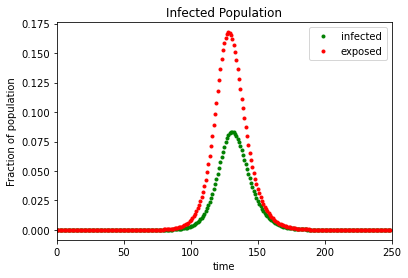

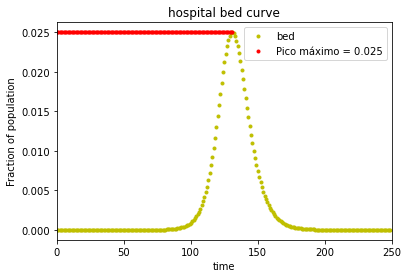

In [8]:
#Declaração das bibliotecas necessarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcao utilizada pelo metodo Runge-Kutta onde calculamos as equacoes do modelo SEIRD
def funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs, f, l, t):
    fs = (1-t)*(-beta*a*b) * hs
    fe = ((1-t)*beta*a*b - sigma*e) * hs
    fi = (sigma * e - gamma * b - mi * b) * hs
    fr = (gamma*b) * hs
    fd = (mi * b) * hs
    fl = l * fi
    return [fs, fe, fi, fr, fd, fl]


# Metodo Runge-Kutta de quarta ordem
def runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e, f, l, tau):

    [a1, e1, b1, c1, d1, f1] = funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs, f, l, tau)

    [ak, bk, ck, dk, ek, fk] = [[a, b, c, d, e, f][indice] + valor * 0.5 for indice, valor in enumerate([a1, b1, c1, d1, e1, f1])]

    [a2, e2, b2, c2, d2, f2] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, fk, l, tau)

    [ak, bk, ck, dk, ek, fk] = [[a, b, c, d, e, f][indice] + valor * 0.5 for indice, valor in enumerate([a2, b2, c2, d2, e2, f2])]

    [a3, e3, b3, c3, d3, f3] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, fk, l, tau)

    [ak, bk, ck, dk, ek, fk] = [[a, b, c, d, e, f][indice] + valor for indice, valor in enumerate([a3, b3, c3, d3, e3, f3])]

    [a4, e4, b4, c4, d4, f4] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs, fk, l, tau)

    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    d = d + (d1 + 2*(d2 + d3) + d4)/6
    e = e + (e1 + 2*(e2 + e3) + e4)/6
    f = f + (f1 + 2*(f2 + f3) + f4)/6
    return a, b, c, d, e, f

# Representa o modelo SEIRD
def SEIRD(N, b0, beta, gamma, hs, mi, sigma, l, tau):

    # condicao de inicializacao
    a = float(N - 2) / N - b0
    b = float(1) / N + b0
    e = float(1) / N + b0
    c = 0.
    d = 0.
    f = 0.

    sus, inf, rec, mort, exp, leit = [], [], [], [], [], []
    for i in range(250):  # roda o numero de passos
        sus.append(a)
        inf.append(b)
        rec.append(c)
        mort.append(d)
        exp.append(e)
        leit.append(f)
        a, b, c, d, e, f = runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e, f, l, tau)

    return sus, inf, rec, mort, exp, leit

#Parametros para os exemplos
N = 1380*(10**6)
b0 = 0
beta = 1.38
gamma = 0.34
sigma = 0.19
mi = 0.03
hs = 1
l = 0.3
tau = 0.3        #### Representa o distanciamento social

sus, inf, rec, mort, exp, leit = SEIRD(N, b0, beta, gamma, hs, mi, sigma, l, tau)

#Plotagem dos graficos

f2 = plt.figure(figsize=(6,4))
plt.plot(inf, 'g.', label='infected')
plt.plot(exp, 'r.', label='exposed')
plt.title("Infected Population")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,250)
plt.savefig('SEIRD3_example.png')


f3 = plt.figure(figsize=(6,4))
plt.plot(leit, 'y.', label='bed')
plt.plot([max(leit) for i, v in enumerate(leit) if i <= leit.index(max(leit))], 'r.', label=f'Pico máximo = {round(max(leit), 3)}')
plt.title("hospital bed curve")
plt.xlabel("time", fontsize=10)
plt.ylabel("Fraction of population", fontsize=10)
plt.legend(loc='best')
plt.xlim(0,250)
plt.savefig('SEIRD4_example.png')


plt.show()


A primeira mudança que visualizamos é no periodo do tempo, a onda de contaminação chegou mais tarde. Além desse atraso na propagação da covid, o numero de leitos necessários diminuiu, essa redução está totalmente ligada ao fator de distanciamento social. Quanto maior esse fator de distanciamento, conseguiremos reduzir o ponto máximo no grafico de leitos.

## Dados da Região de Pernambuco mais Atualizados

## Referencias

https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions

https://towardsdatascience.com/simulating-compartmental-models-in-epidemiology-using-python-jupyter-widgets-8d76bdaff5c2